<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Principal Component Analysis with scikit-learn in Python -- Project Solution

Let's use the the famous IRIS data set for this project. The iris data have only 4 features and may not be an ideal dataset for PCA. However, our goal is to apply and practice the skills that we have learned in the previous section. 

**Let's import some important libraries and load the dataset first!**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

**Let's load the iris dataset**

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

**Create the dataframe and output the head of the data, use features_names as columns**

In [4]:
#Code here please

In [5]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**import `StandardScaler` and create its instance.** 

In [7]:
#Code here please

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the scaler to the features in your data.**

In [9]:
#Code here please

In [10]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Please transform the dataset to the scaled data.**

In [11]:
#Code here please

In [12]:
df_scaled = scaler.transform(df)

### Principal Component Analysis -- PCA
**import PCA and create its instance, what shoud we do if we are interested in only first 2 components?**

In [13]:
#Code here please

In [14]:
#importing
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

**Fit the object to scaled data** 

In [15]:
#Code here please

In [16]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Let's transform the data to its first 2 PCs.**

In [17]:
#Code here please

In [18]:
pc12 = pca.transform(df_scaled)

**pc12 is a numpy array, let's create a dataframe, the data looks better in this way!** 

In [19]:
#Code here please

In [20]:
df_pca=pd.DataFrame(pc12, columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


**Please recreate the plot below**

In [21]:
#Code here please

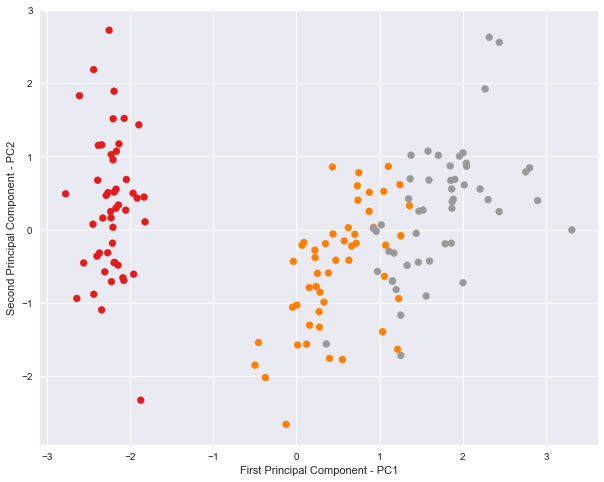

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(x=df_pca['PC1'],y=df_pca['PC2'], c=iris['target'],cmap='Set1')
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')

**How to get the components, create a dataframe and output its head.**

In [23]:
#Code here please

In [24]:
pca.components_
df_pca_comp = pd.DataFrame(pca.components_, columns=iris['feature_names'])
df_pca_comp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


**Please recreate the plot below.**

In [25]:
#Code here please

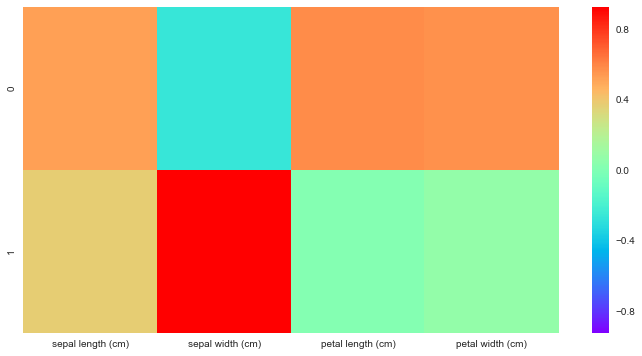

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df_pca_comp,cmap='rainbow',)

## SVM on Principal Components
**Separate features and target classes and do the train test split** 

In [27]:
#Separating features and target values 
X = df_pca
y = iris['target']
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

**Import SVC create its instance **

In [28]:
#Code here please

In [29]:
from sklearn.svm import SVC
model = SVC()

**Train your model**

In [30]:
#Code here please

In [31]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

** Do the predictions please ** 

In [32]:
#Code here please

In [33]:
predictions = model.predict(X_test)

**Evaluation -- print Classification Report and Confusion Matrix** 

In [34]:
#Code here please

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.92      0.85      0.88        13
          2       0.86      0.92      0.89        13

avg / total       0.93      0.93      0.93        45

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]


# Excellent work!
I hope you enjoyed learning PCA. You have realized how powerful this statistical tool is for higher dimensional data. <br>
The results above could be improved with the GridSearch to find out the best values for C and gamma. 